In [ ]:
! pip install -q kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
!kaggle competitions download -c dogs-vs-cats
! unzip dogs-vs-cats.zip
!mkdir ./dogs-vs-cats
!unzip train.zip -d ./dogs-vs-cats
!mkdir ./dogs-vs-cats/test
!unzip test1.zip -d ./dogs-vs-cats/test

Streaming output truncated to the last 5000 lines.
  inflating: ./dogs-vs-cats/test/test1/5499.jpg  
  inflating: ./dogs-vs-cats/test/test1/55.jpg  
  inflating: ./dogs-vs-cats/test/test1/550.jpg  
  inflating: ./dogs-vs-cats/test/test1/5500.jpg  
  inflating: ./dogs-vs-cats/test/test1/5501.jpg  
  inflating: ./dogs-vs-cats/test/test1/5502.jpg  
  inflating: ./dogs-vs-cats/test/test1/5503.jpg  
  inflating: ./dogs-vs-cats/test/test1/5504.jpg  
  inflating: ./dogs-vs-cats/test/test1/5505.jpg  
  inflating: ./dogs-vs-cats/test/test1/5506.jpg  
  inflating: ./dogs-vs-cats/test/test1/5507.jpg  
  inflating: ./dogs-vs-cats/test/test1/5508.jpg  
  inflating: ./dogs-vs-cats/test/test1/5509.jpg  
  inflating: ./dogs-vs-cats/test/test1/551.jpg  
  inflating: ./dogs-vs-cats/test/test1/5510.jpg  
  inflating: ./dogs-vs-cats/test/test1/5511.jpg  
  inflating: ./dogs-vs-cats/test/test1/5512.jpg  
  inflating: ./dogs-vs-cats/test/test1/5513.jpg  
  inflating: ./dogs-vs-cats/test/test1/5514.jpg  
  i

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from PIL import Image

In [ ]:
image_size = (128, 128)
image_width, image_height = image_size
image_channels = 3
batch_size=20

In [ ]:
import os
path = "./dogs-vs-cats/train"
filenames = os.listdir(path)
imgs = []
categories=[]

for f in filenames:
    cat_or_dog = f.split('.')[0]
    categories.append(0 if cat_or_dog=='cat' else 1)

    img = Image.open(path + '//' + f)
    img = img.resize(image_size)
    img = np.array(img).flatten()
    imgs.append(img)

imgs = np.array(imgs)
categories = np.array(categories)

In [ ]:
imgs[:5], categories[:5]

(array([[ 22,  21,  17, ..., 146, 136, 145],
        [ 64,  36,  41, ..., 169, 155, 109],
        [  3,   3,   3, ...,  43,  42,  40],
        [156, 166, 169, ...,  11,   7,   4],
        [199, 190, 196, ...,  47,  41,  48]], dtype=uint8),
 array([0, 0, 0, 0, 1]))

In [ ]:
image_df = pd.DataFrame(imgs)
image_df.head()

,0,1,2,3,4,5,6,7,8,9,...,49142,49143,49144,49145,49146,49147,49148,49149,49150,49151
0,22,21,17,21,20,16,24,23,19,20,...,131,140,130,138,145,133,143,146,136,145
1,64,36,41,66,38,43,67,39,44,69,...,113,165,151,106,166,153,102,169,155,109
2,3,3,3,3,3,3,3,3,3,3,...,41,44,44,42,46,46,44,43,42,40
3,156,166,169,164,164,173,169,162,171,166,...,7,13,8,7,11,6,6,11,7,4
4,199,190,196,196,187,191,184,174,177,191,...,43,48,42,45,45,40,46,47,41,48


In [ ]:
train_df_img, val_df_img, train_y, val_y = train_test_split(image_df, categories, test_size=0.3, random_state=42)

In [ ]:
print("Training Data Size:", train_df_img.shape)
print("Validation Data Size:", val_df_img.shape)

Training Data Size: (17500, 49152)
Validation Data Size: (7500, 49152)


In [ ]:
svm = SGDClassifier(loss='hinge')
scores = []
ind=0

In [ ]:
svm.fit(train_df_img[:batch_size], train_y[:batch_size])
score = svm.score(val_df_img[ind:ind+batch_size], val_y[ind:ind+batch_size])
scores.append(score)
ind = (ind+batch_size)%len(val_y)

In [ ]:
for i in range(0, len(train_y), batch_size):
  svm.partial_fit(train_df_img[i:i+batch_size], train_y[i:i+batch_size])
  score = svm.score(val_df_img[ind:ind+batch_size], val_y[ind:ind+batch_size])
  scores.append(score)
  ind = (ind+batch_size)%len(val_y)

In [ ]:
scores_avg = []
for i in range(0, len(scores), 20):
  sample = scores[i:i+50]
  scores_avg.append(sum(sample)/50)

In [ ]:
len(scores_avg)

44

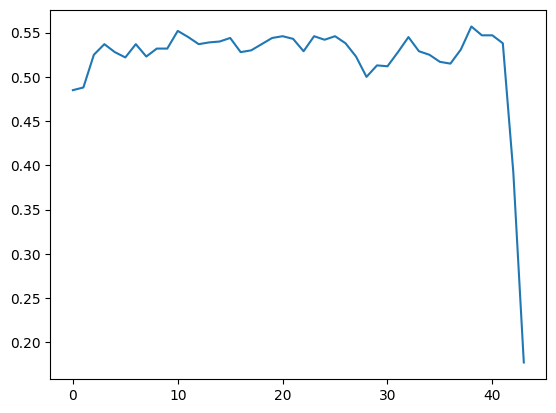

In [ ]:
plt.plot(scores_avg)

In [ ]:
def evaluate(model, val_df_X, val_df_y, batch_size=50):
  eval_scores = []
  for i in range(0, len(val_df_y), batch_size):
    sc = model.score(val_df_X[i:i+batch_size], val_df_y[i:i+batch_size])
    eval_scores.append(sc)
  return eval_scores

In [ ]:
eval_scores = evaluate(svm, val_df_img, val_y)
avg = sum(eval_scores)/len(eval_scores)
print("Evaluation Score (Avg): %.4f" %avg)

Evaluation Score (Avg): 0.5536


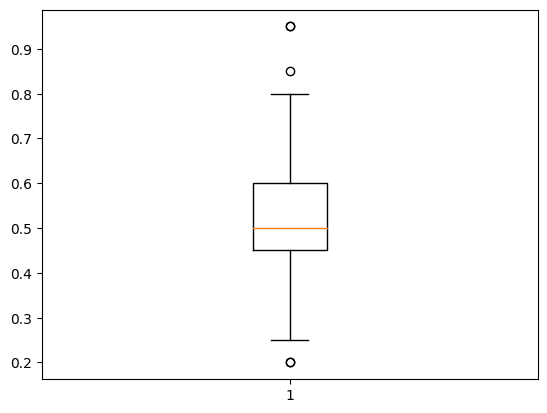

In [ ]:
plt.boxplot(scores)
plt.show()